# Analiza danych w Pythonie: sklearn

### Tomasz Dwojak

### 3 czerwca 2018

 * Pierwsza część: pandas
 * Druga część: sklearn

### Przypomnienie z UMZ
 * przygotowanie i czyszczenie danych
 * wybór i trening modelu
 * tuning
 * ewaluacja

In [17]:
import sklearn
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("./gapminder.csv", index_col=0)

In [6]:
data.head()

female_BMI  male_BMI      gdp  population  \
Afghanistan            21.07402  20.62058   1311.0  26528741.0   
Albania                25.65726  26.44657   8644.0   2968026.0   
Algeria                26.36841  24.59620  12314.0  34811059.0   
Angola                 23.48431  22.25083   7103.0  19842251.0   
Antigua and Barbuda    27.50545  25.76602  25736.0     85350.0   

                     under5mortality  life_expectancy  fertility  
Afghanistan                    110.4             52.8       6.20  
Albania                         17.9             76.8       1.76  
Algeria                         29.5             75.5       2.73  
Angola                         192.0             56.7       6.43  
Antigua and Barbuda             10.9             75.5       2.16

In [7]:
y = data['life_expectancy']
X = data.drop('life_expectancy', axis=1)

In [13]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = \
    train_test_split(X, y, test_size=0.2, random_state=123, shuffle=True)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
predicted = model.predict(test_X)
predicted[:5]

array([67.56279809, 76.25840076, 50.21126326, 59.21303855, 72.06348723])

In [18]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(predicted, test_y))
print("RMSE:", rmse)

RMSE: 3.5179543848147863


In [20]:
 r2 = model.score(test_X, test_y)

0.795295000468209

#### API
 * model
 * `fix`
 * `predict`

In [30]:
for p in zip(train_X.columns, model.coef_):
    print("{}: {:.3}".format(p[0], p[1]))

female_BMI: -1.18
male_BMI: 1.46
gdp: 5.11e-05
population: 7.21e-10
under5mortality: -0.159
fertility: 0.421


In [36]:
model2 = LinearRegression()
model2.fit(train_X['male_BMI'].reshape(-1, 1), train_y)

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [37]:
model2.intercept_

0.5852413468462743

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


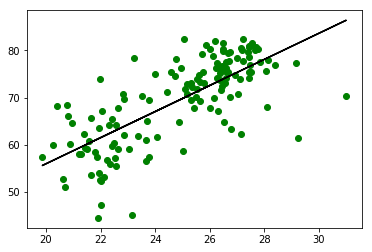

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.scatter(train_X['male_BMI'], train_y,color='g')
plt.plot(train_X['male_BMI'], model2.predict(train_X['male_BMI'].reshape(-1, 1)),color='k')

plt.show()